In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
import pandas as pd


file_path = 'Food_properties.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path, engine = 'openpyxl')

df

,Unnamed: 0,Unnamed: 1,Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,Conductivity (S),Unnamed: 11,Unnamed: 12,Unnamed: 13,DO (ppm),"*Observer: 10 degree, Reference illuminant D",Unnamed: 16,Unnamed: 17
0,NaN,(per 1ml),(g),NaN,NaN,NaN,NaN,NaN,AVE,AVE,100Hz,400Hz,1kHz,10kHz,NaN,L,a*,b*
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dairy,Yoghurt (diluted half with water),0.010753,0.000027,0.000175,0.000000,0.021505,0.045699,3.931636,161.754545,0.00979,0.004976,0.004177,0.003832,8.1096,240.8258,258.958375,166.317034
3,NaN,Cream,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
4,NaN,Milk 0% fat,0,0.000021,0.000542,0.000000,0.054167,0.037500,6.473364,10.772727,0.010789,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146
5,NaN,Milk 1% fat,0.01,0.000060,0.000545,0.000000,0.054542,0.038375,6.475818,11.236364,0.011754,0.006763,0.005764,0.005332,0.1577,239.962692,258.751532,172.176335
6,NaN,Milk 2% fat,0.02,0.000100,0.000549,0.000000,0.054917,0.039250,6.484091,12.336364,0.011572,0.006816,0.005819,0.005436,0.1040,232.758306,272.136703,180.721357
7,NaN,Milk 3.4% fat,0.034,0.000155,0.000554,0.000000,0.055442,0.040475,6.503,9.836364,0.011899,0.006479,0.005472,0.005059,0.0791,240.801607,258.556618,172.003756
8,NaN,Half and half,0.166667,0.000677,0.000604,0.000000,0.060417,0.052083,6.378364,16.772727,0.009854,0.004729,0.004008,0.003712,0.0719,240.821411,258.859595,168.355434
9,Juice,Apple juice,0,0.000000,0.000146,0.000000,0.116667,0.000000,3.755,175.209091,0.006563,0.003271,0.002812,0.002637,5.4946,185.577328,266.108111,234.579847


In [3]:
df = df.iloc[:, 1:]

In [4]:
df

,Unnamed: 1,Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,Conductivity (S),Unnamed: 11,Unnamed: 12,Unnamed: 13,DO (ppm),"*Observer: 10 degree, Reference illuminant D",Unnamed: 16,Unnamed: 17
0,(per 1ml),(g),NaN,NaN,NaN,NaN,NaN,AVE,AVE,100Hz,400Hz,1kHz,10kHz,NaN,L,a*,b*
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yoghurt (diluted half with water),0.010753,0.000027,0.000175,0.000000,0.021505,0.045699,3.931636,161.754545,0.00979,0.004976,0.004177,0.003832,8.1096,240.8258,258.958375,166.317034
3,Cream,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
4,Milk 0% fat,0,0.000021,0.000542,0.000000,0.054167,0.037500,6.473364,10.772727,0.010789,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146
5,Milk 1% fat,0.01,0.000060,0.000545,0.000000,0.054542,0.038375,6.475818,11.236364,0.011754,0.006763,0.005764,0.005332,0.1577,239.962692,258.751532,172.176335
6,Milk 2% fat,0.02,0.000100,0.000549,0.000000,0.054917,0.039250,6.484091,12.336364,0.011572,0.006816,0.005819,0.005436,0.1040,232.758306,272.136703,180.721357
7,Milk 3.4% fat,0.034,0.000155,0.000554,0.000000,0.055442,0.040475,6.503,9.836364,0.011899,0.006479,0.005472,0.005059,0.0791,240.801607,258.556618,172.003756
8,Half and half,0.166667,0.000677,0.000604,0.000000,0.060417,0.052083,6.378364,16.772727,0.009854,0.004729,0.004008,0.003712,0.0719,240.821411,258.859595,168.355434
9,Apple juice,0,0.000000,0.000146,0.000000,0.116667,0.000000,3.755,175.209091,0.006563,0.003271,0.002812,0.002637,5.4946,185.577328,266.108111,234.579847


In [5]:
df = df.rename(columns={'Unnamed: 1': 'Food', 
                            'Conductivity (S)':'COnductivity(100z)',
                            'Unnamed: 11':'Conductivity(400Hz)',
                            'Unnamed: 12':'Conductivity(1000Hz)',
                            'Unnamed: 13':'Conductivity(10000Hz)',
                           })
df

,Food,Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,COnductivity(100z),Conductivity(400Hz),Conductivity(1000Hz),Conductivity(10000Hz),DO (ppm),"*Observer: 10 degree, Reference illuminant D",Unnamed: 16,Unnamed: 17
0,(per 1ml),(g),NaN,NaN,NaN,NaN,NaN,AVE,AVE,100Hz,400Hz,1kHz,10kHz,NaN,L,a*,b*
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yoghurt (diluted half with water),0.010753,0.000027,0.000175,0.000000,0.021505,0.045699,3.931636,161.754545,0.00979,0.004976,0.004177,0.003832,8.1096,240.8258,258.958375,166.317034
3,Cream,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
4,Milk 0% fat,0,0.000021,0.000542,0.000000,0.054167,0.037500,6.473364,10.772727,0.010789,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146
5,Milk 1% fat,0.01,0.000060,0.000545,0.000000,0.054542,0.038375,6.475818,11.236364,0.011754,0.006763,0.005764,0.005332,0.1577,239.962692,258.751532,172.176335
6,Milk 2% fat,0.02,0.000100,0.000549,0.000000,0.054917,0.039250,6.484091,12.336364,0.011572,0.006816,0.005819,0.005436,0.1040,232.758306,272.136703,180.721357
7,Milk 3.4% fat,0.034,0.000155,0.000554,0.000000,0.055442,0.040475,6.503,9.836364,0.011899,0.006479,0.005472,0.005059,0.0791,240.801607,258.556618,172.003756
8,Half and half,0.166667,0.000677,0.000604,0.000000,0.060417,0.052083,6.378364,16.772727,0.009854,0.004729,0.004008,0.003712,0.0719,240.821411,258.859595,168.355434
9,Apple juice,0,0.000000,0.000146,0.000000,0.116667,0.000000,3.755,175.209091,0.006563,0.003271,0.002812,0.002637,5.4946,185.577328,266.108111,234.579847


In [6]:
df = df.dropna()

In [7]:
df

,Food,Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,COnductivity(100z),Conductivity(400Hz),Conductivity(1000Hz),Conductivity(10000Hz),DO (ppm),"*Observer: 10 degree, Reference illuminant D",Unnamed: 16,Unnamed: 17
2,Yoghurt (diluted half with water),0.010753,0.000027,0.000175,0.000000,0.021505,0.045699,3.931636,161.754545,0.00979,0.004976,0.004177,0.003832,8.1096,240.8258,258.958375,166.317034
3,Cream,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
4,Milk 0% fat,0,0.000021,0.000542,0.000000,0.054167,0.037500,6.473364,10.772727,0.010789,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146
5,Milk 1% fat,0.01,0.000060,0.000545,0.000000,0.054542,0.038375,6.475818,11.236364,0.011754,0.006763,0.005764,0.005332,0.1577,239.962692,258.751532,172.176335
6,Milk 2% fat,0.02,0.000100,0.000549,0.000000,0.054917,0.039250,6.484091,12.336364,0.011572,0.006816,0.005819,0.005436,0.1040,232.758306,272.136703,180.721357
7,Milk 3.4% fat,0.034,0.000155,0.000554,0.000000,0.055442,0.040475,6.503,9.836364,0.011899,0.006479,0.005472,0.005059,0.0791,240.801607,258.556618,172.003756
8,Half and half,0.166667,0.000677,0.000604,0.000000,0.060417,0.052083,6.378364,16.772727,0.009854,0.004729,0.004008,0.003712,0.0719,240.821411,258.859595,168.355434
9,Apple juice,0,0.000000,0.000146,0.000000,0.116667,0.000000,3.755,175.209091,0.006563,0.003271,0.002812,0.002637,5.4946,185.577328,266.108111,234.579847
10,Cranberry juice,0,0.000000,0.000146,0.000125,0.137500,0.000000,2.556636,248.7,0.000071,0.001018,0.001108,0.001176,3.8798,208.343231,296.677537,232.743793
11,Grape juice,0,0.000000,0.000146,0.000000,0.166667,0.000000,2.734364,232.9,0.005823,0.003112,0.002694,0.002508,8.4654,178.507907,202.614262,212.304132


In [8]:
X = df.drop(columns=['Food'])

### Dendogram based on Food properties

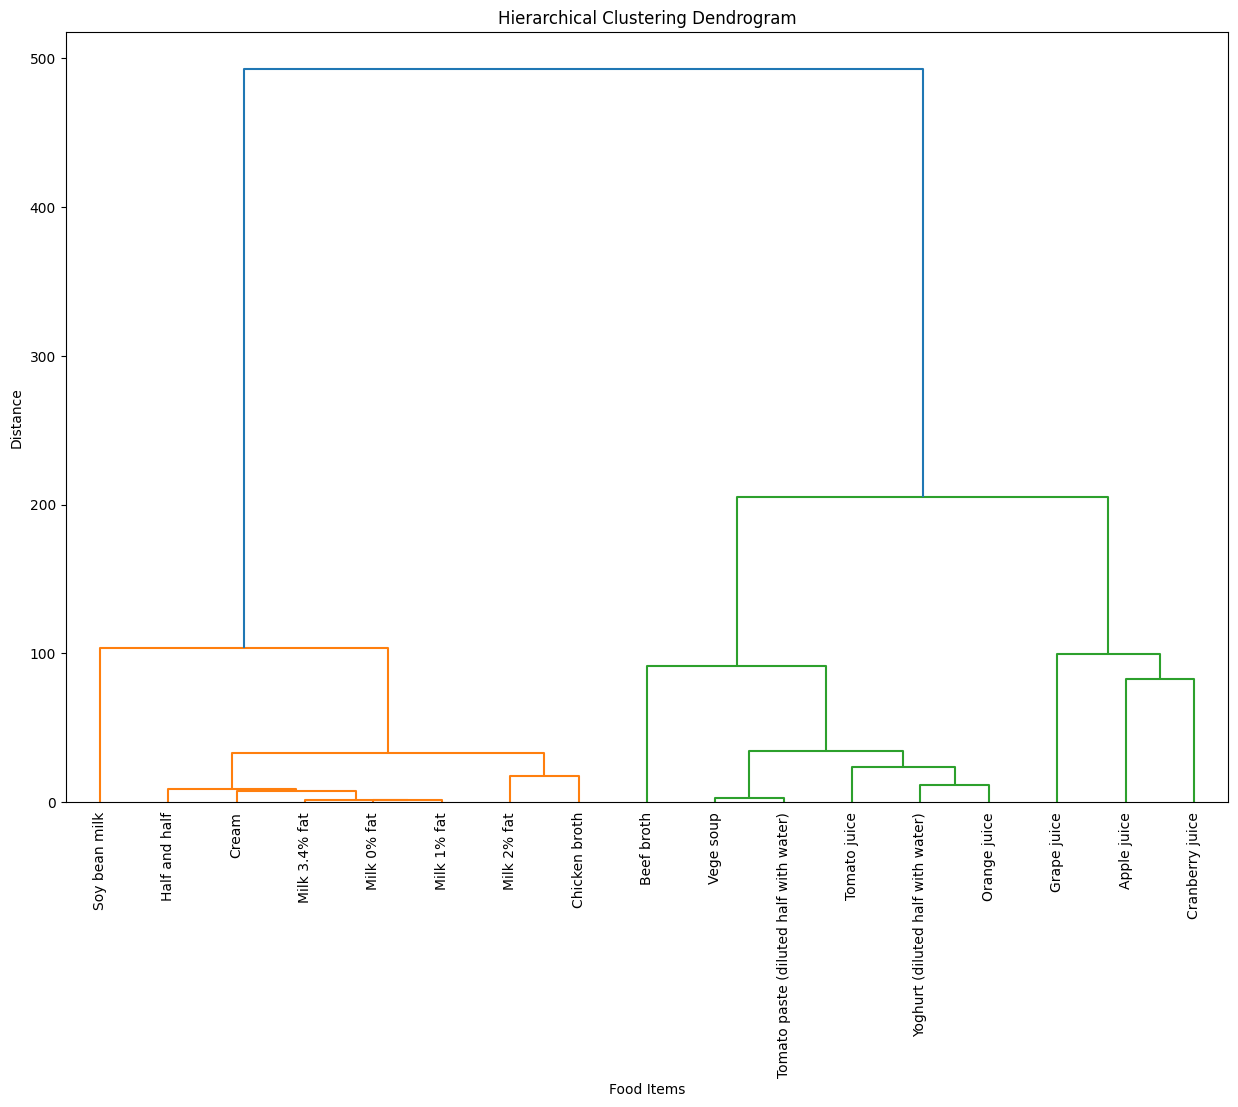

In [9]:
Z = linkage(X, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=df['Food'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Food Items')
plt.ylabel('Distance')
plt.show()

In [10]:
import pickle
df10 = pickle.load(open('zgraphs10min.pkl', 'rb'))
df20 = pickle.load(open('zgraphs20min.pkl', 'rb'))
# df20 = df20.applymap(lambda x: x*-1)
df20

,Food,100000,89130,79430,70800,63110,56240,50120,44680,39810,...,28.57,24.99,22.22,20,17.65,15.79,14.28,12.5,11.32,9.999
0,Yoghurt (diluted half with water),-0.004533,-0.005213,-0.005868,-0.006525,-0.005887,-0.003300,-0.004600,-0.003950,-0.005899,...,0.001673,0.001049,0.002488,-0.002918,0.000845,0.001013,0.000174,0.009368,0.006042,-0.003090
1,Cream,0.049585,0.046986,0.046793,0.046678,0.047586,0.050221,0.047749,0.044980,0.046719,...,0.010414,0.011204,0.011212,0.010328,0.013836,0.014417,0.015706,0.008994,0.012913,0.005906
2,Milk 0% fat,0.004363,0.005257,0.007045,0.003528,0.003534,0.005305,0.004426,0.001779,0.007092,...,0.019235,0.022901,0.021616,0.021899,0.013108,0.019361,0.026528,0.016206,0.011128,0.020500
3,Milk 1% fat,0.001462,0.001391,-0.000311,-0.001205,0.000582,0.001457,0.001399,-0.001209,0.004158,...,-0.004713,-0.007218,-0.008347,-0.007739,-0.009509,0.005275,-0.017731,-0.020855,-0.021651,-0.011060
4,Milk 2% fat,-0.027116,-0.025494,-0.026365,-0.023017,-0.023863,-0.026482,-0.023086,-0.023980,-0.022262,...,0.005673,0.003905,0.004498,0.005764,0.009705,0.011252,0.019210,0.007751,0.015918,0.011410
5,Milk 3.4% fat,-0.010294,-0.007230,-0.009616,-0.006436,-0.006413,-0.006407,-0.004812,-0.006398,-0.006432,...,0.002388,-0.000291,0.004080,0.002200,-0.001270,-0.001984,0.014600,0.012438,0.002961,-0.002408
6,Half and half,0.013966,0.013064,0.013077,0.011962,0.010793,0.008514,0.009791,0.006269,0.009332,...,-0.018334,-0.022526,-0.018703,-0.020570,-0.019680,-0.017287,-0.016522,-0.033494,-0.024340,-0.025982
7,Apple juice,0.023893,0.025280,0.021515,0.022859,0.022487,0.016424,0.018197,0.016054,0.019935,...,0.042843,0.042135,0.043111,0.043939,0.045453,0.043598,0.047475,0.047206,0.048153,0.044582
8,Cranberry juice,-0.060028,-0.060512,-0.060997,-0.062188,-0.061854,-0.062633,-0.062410,-0.059982,-0.059425,...,-0.018740,-0.020693,-0.021390,-0.020859,-0.019057,-0.021531,-0.017447,-0.016040,-0.007062,-0.029545
9,Grape juice,-0.009778,-0.011374,-0.008934,-0.007730,-0.009014,-0.007760,-0.009391,-0.009798,-0.007754,...,0.012720,0.011559,0.012904,0.011628,0.011799,0.013117,0.012699,0.017769,0.015750,0.011586


### Dendogram for 10 and 20 min data

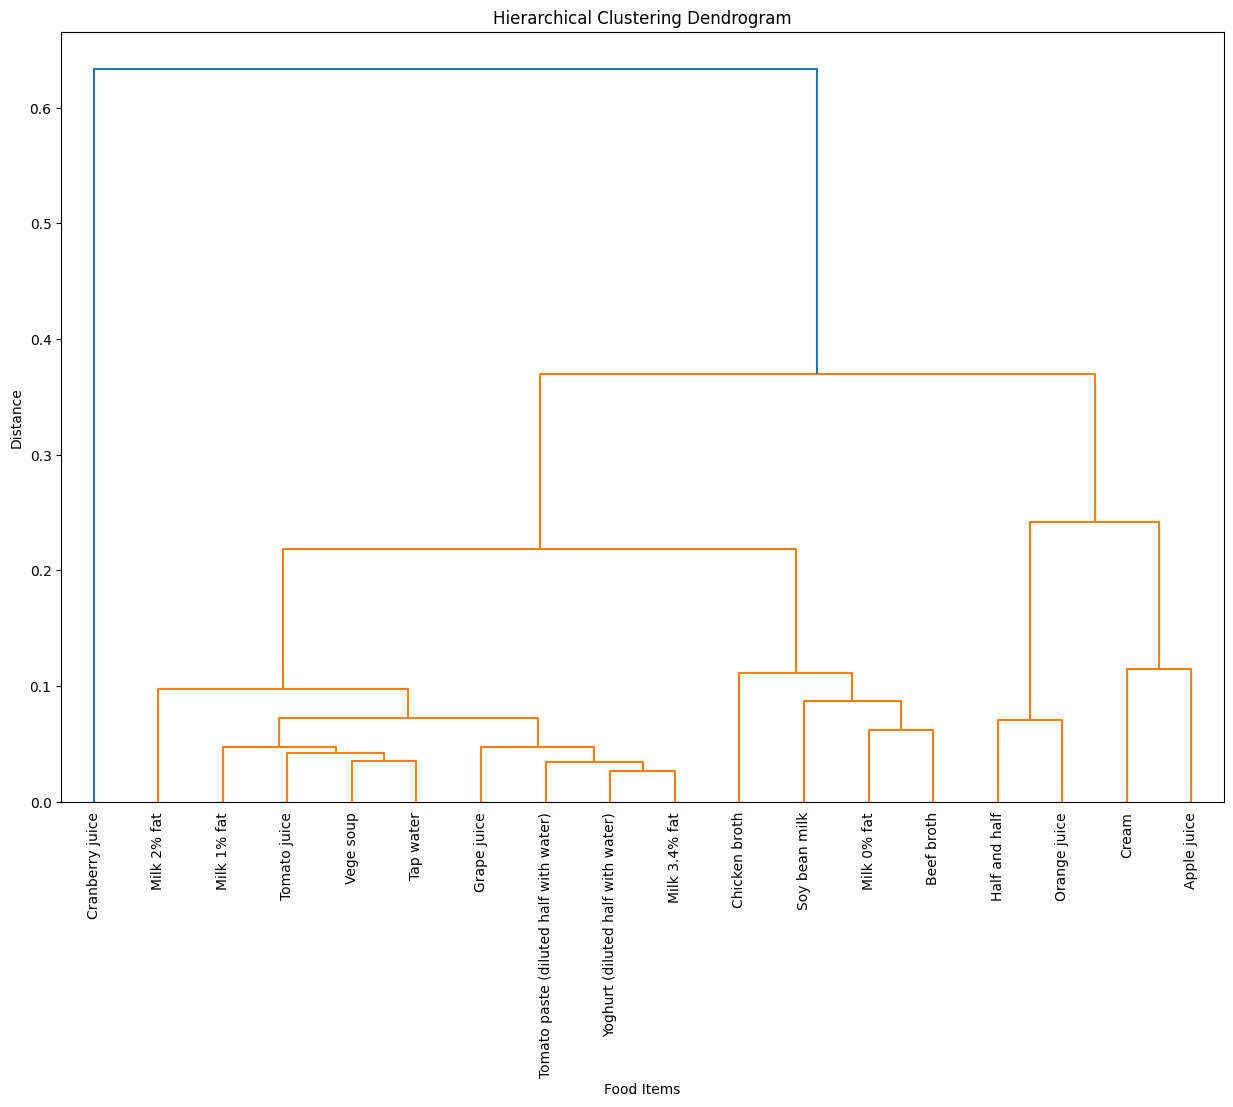

In [11]:
X10 = df10.drop(columns=['Food'])
Z10 = linkage(X10, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z10, labels=df10['Food'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Food Items')
plt.ylabel('Distance')
plt.show()

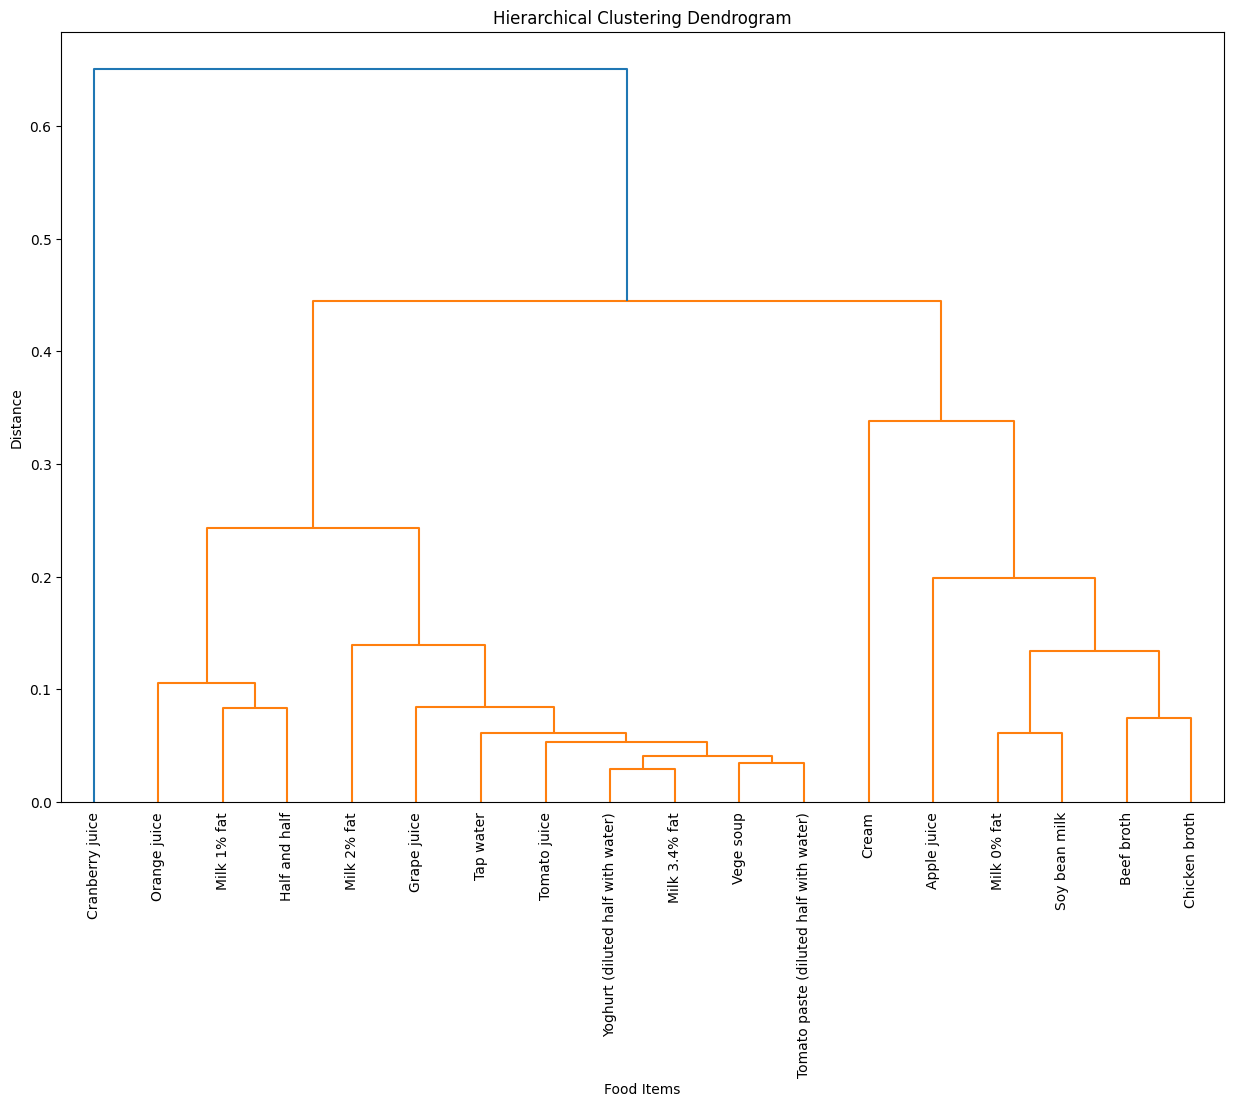

In [12]:
X20 = df20.drop(columns=['Food'])
Z20 = linkage(X20, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z20, labels=df10['Food'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Food Items')
plt.ylabel('Distance')
plt.show()

### Rest of the notebook plots the difference in impedence for each food group for each time frame

In [13]:
df10

,Food,100000,89130,79430,70800,63110,56240,50120,44680,39810,...,28.57,24.99,22.22,20,17.65,15.79,14.28,12.5,11.32,9.999
0,Yoghurt (diluted half with water),0.007138,0.003945,0.005879,0.006537,0.005892,0.005907,0.004613,0.005262,0.005926,...,0.001721,-0.000593,-0.002087,0.000899,-0.001432,0.003978,-0.000635,-0.009821,-0.015396,0.000803
1,Cream,-0.031194,-0.030048,-0.028431,-0.027138,-0.031073,-0.029480,-0.029075,-0.024118,-0.027925,...,-0.006694,-0.008469,-0.008732,-0.008964,-0.008420,-0.010355,-0.011981,-0.011455,-0.013641,-0.004466
2,Milk 0% fat,-0.006997,-0.005257,-0.005282,-0.004412,-0.006191,-0.007967,-0.006203,-0.000892,-0.002659,...,-0.012323,-0.018120,-0.018689,-0.009681,-0.012465,-0.018068,-0.016727,-0.018570,-0.019348,-0.004920
3,Milk 1% fat,0.003819,0.002084,0.001183,0.001178,0.000351,0.002072,-0.000553,0.000305,-0.000597,...,0.007181,0.004545,0.015011,0.007299,0.005045,-0.003451,0.006687,0.008910,0.004171,-0.001546
4,Milk 2% fat,0.017746,0.016067,0.016928,0.012687,0.016110,0.016149,0.015301,0.015329,0.015329,...,-0.004117,-0.006112,-0.004170,-0.006142,-0.007269,-0.008497,-0.016609,-0.007499,-0.011024,-0.003219
5,Milk 3.4% fat,0.008739,0.004811,0.007213,0.004827,0.005633,0.004803,0.005668,0.005628,0.005655,...,-0.001428,-0.001353,-0.005486,-0.004668,0.000187,-0.000955,-0.001939,-0.008406,-0.010953,-0.002985
6,Half and half,-0.026450,-0.022343,-0.024921,-0.021883,-0.022586,-0.019623,-0.020907,-0.019210,-0.020427,...,0.007977,0.010557,0.008846,0.009461,0.019499,0.010662,0.008731,0.029826,0.013675,0.012954
7,Apple juice,-0.028827,-0.031126,-0.030756,-0.032075,-0.029560,-0.027427,-0.027052,-0.025342,-0.024007,...,-0.031598,-0.031028,-0.031706,-0.032608,-0.033673,-0.031949,-0.033581,-0.031927,-0.033291,-0.031271
8,Cranberry juice,0.049511,0.052280,0.054488,0.053402,0.056832,0.057976,0.056819,0.055499,0.055007,...,0.010859,0.007478,0.008316,0.007969,0.007683,0.006967,0.009278,0.004981,0.002584,0.024144
9,Grape juice,0.001669,0.004061,0.002026,0.001189,0.000794,0.001212,0.002859,0.001167,0.000762,...,-0.008457,-0.006676,-0.009333,-0.008467,-0.008624,-0.012960,-0.011561,-0.016263,-0.013623,-0.009510


In [14]:
# List of rows (food items) to keep in the first group
rows_group1 = ["Half and half", "Soy bean milk", "Cream", "Milk 0% fat", "Milk 1% fat", "Milk 2% fat", "Milk 3.4% fat", "Chicken broth"]

# Create the first group DataFrame
df10_group1 = df10[df10['Food'].isin(rows_group1)]

# Create the second group DataFrame (complement of the first group)
df10_group2 = df10[~df10['Food'].isin(rows_group1)]

In [15]:
df10_group1.set_index("Food", inplace=True)

In [16]:
df10_group1 = df10_group1.T

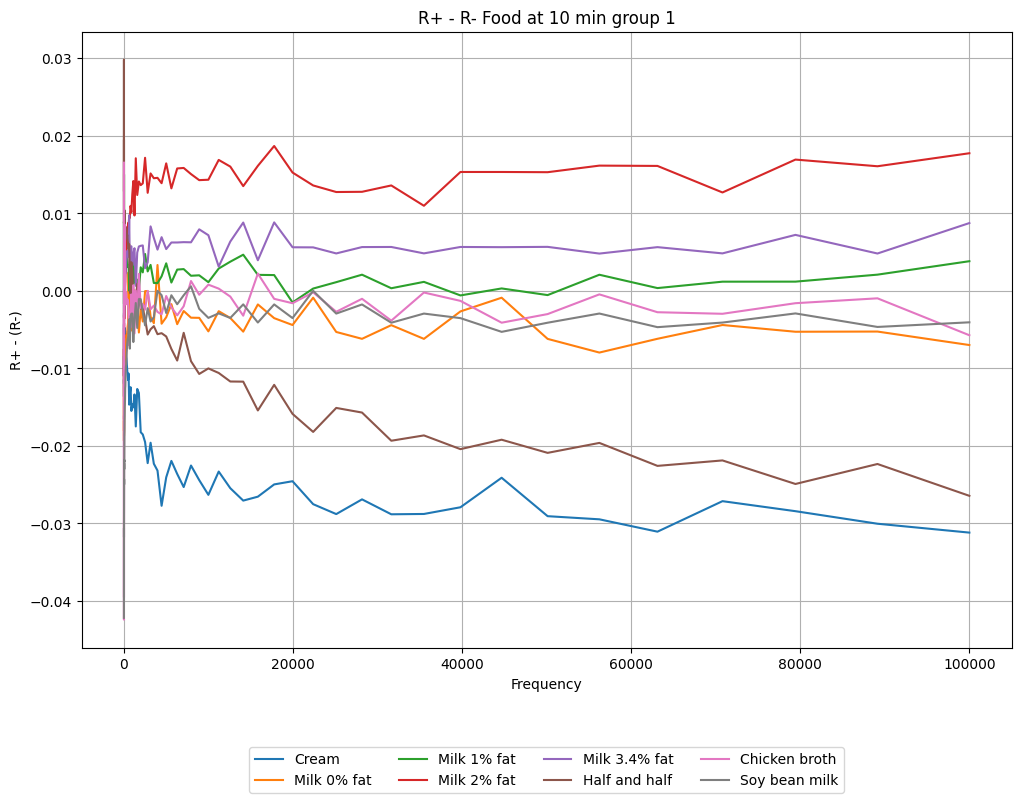

In [17]:
plt.figure(figsize=(12, 8))
for food in df10_group1.columns:
    plt.plot(df10_group1.index, df10_group1[food], label=food)
plt.xlabel('Frequency')
plt.ylabel('R+ - (R-)')
plt.title('R+ - R- Food at 10 min group 1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(True)
plt.show()

In [18]:
df10_group2.set_index("Food", inplace=True)

In [19]:
df10_group2 = df10_group2.T

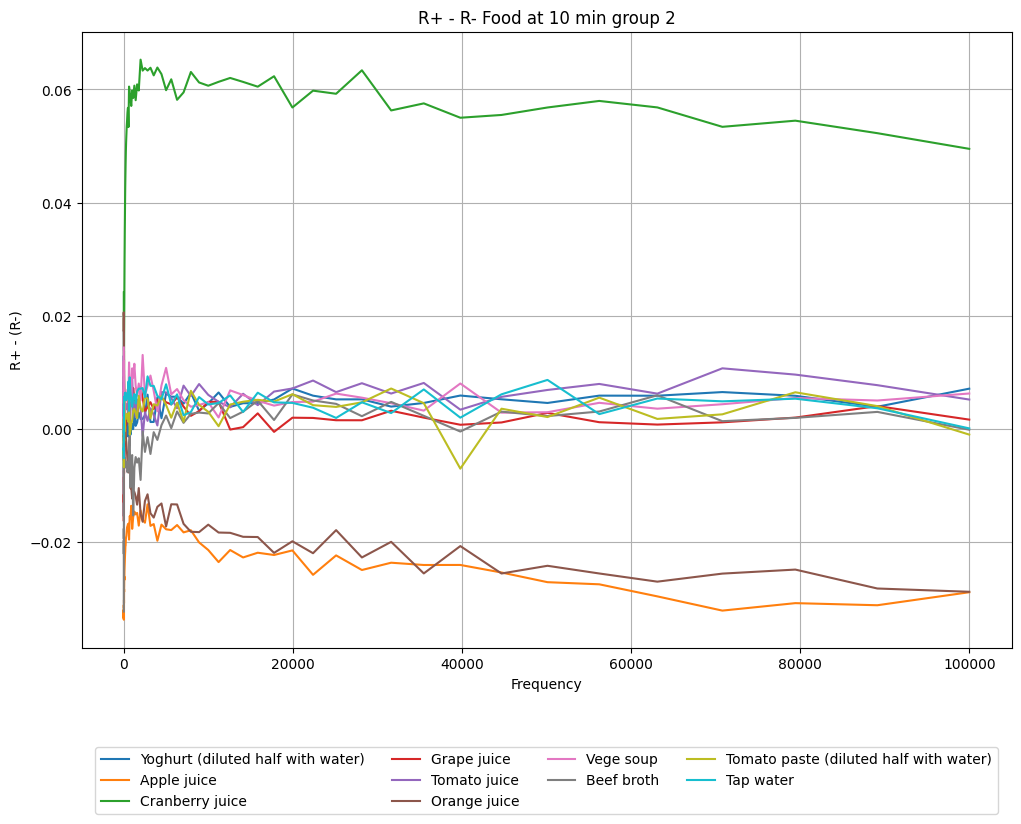

In [20]:
plt.figure(figsize=(12, 8))
for food in df10_group2.columns:
    plt.plot(df10_group2.index, df10_group2[food], label=food)
plt.xlabel('Frequency')
plt.ylabel('R+ - (R-)')
plt.title('R+ - R- Food at 10 min group 2')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(True)
plt.show()

C:\Users\maima\AppData\Local\Temp\ipykernel_31072\2071019413.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df20_group1 = df20_group1.applymap(lambda x: x*-1)


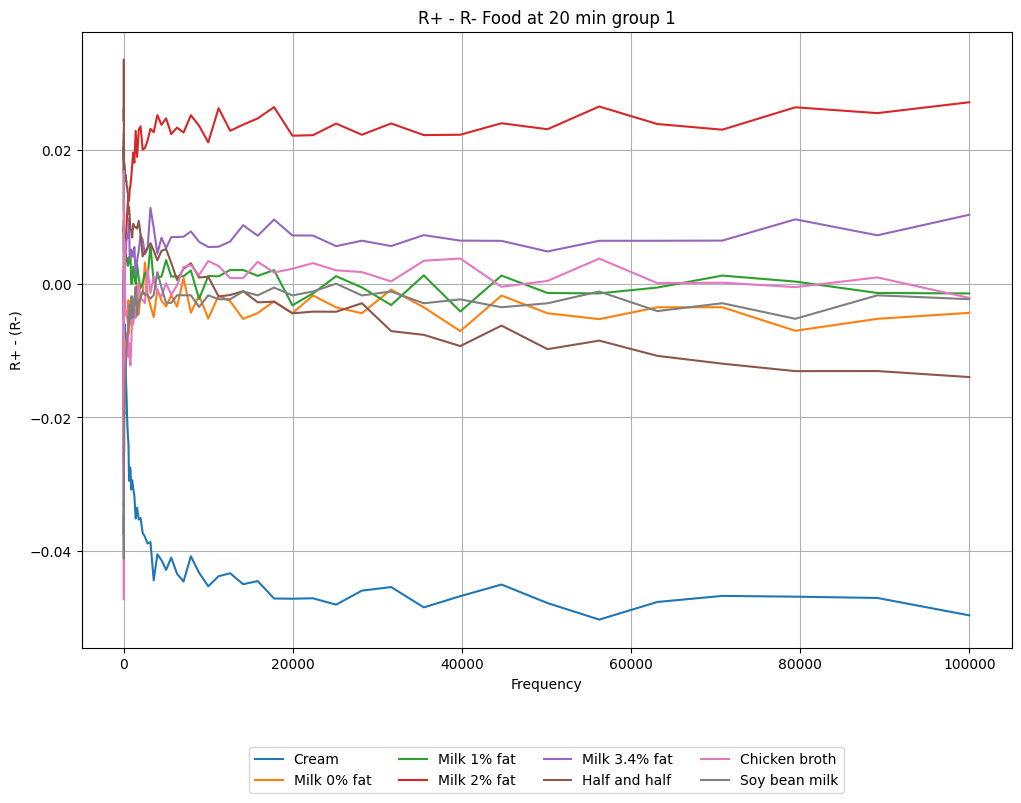

In [21]:

# Create the first group DataFrame

df20_group1 = df20[df20['Food'].isin(rows_group1)]

# Create the second group DataFrame (complement of the first group)
df20_group2 = df20[~df20['Food'].isin(rows_group1)]
df20_group1.set_index("Food", inplace=True)
df20_group1 = df20_group1.applymap(lambda x: x*-1)
df20_group1 = df20_group1.T

plt.figure(figsize=(12, 8))
for food in df20_group1.columns:
    plt.plot(df20_group1.index, df20_group1[food], label=food)
plt.xlabel('Frequency')
plt.ylabel('R+ - (R-)')
plt.title('R+ - R- Food at 20 min group 1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(True)
plt.show()

C:\Users\maima\AppData\Local\Temp\ipykernel_31072\1654179250.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df20_group2 = df20_group2.applymap(lambda x: x*-1)


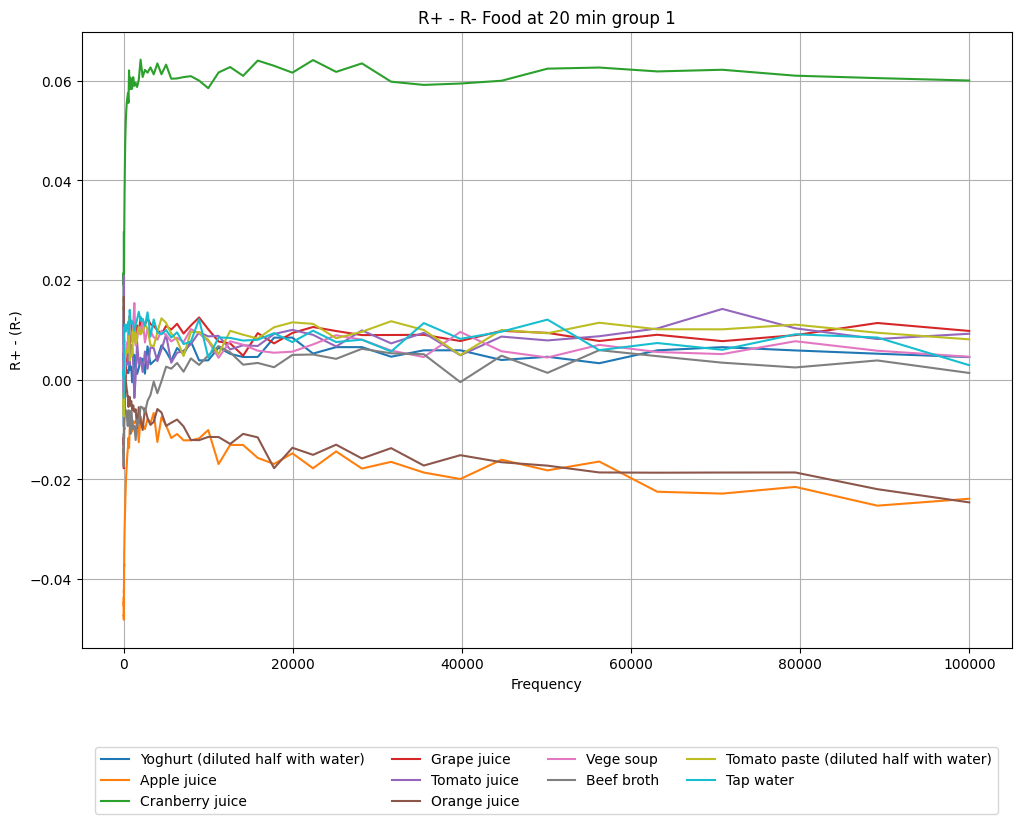

In [22]:
df20_group2.set_index("Food", inplace=True)
df20_group2 = df20_group2.applymap(lambda x: x*-1)
df20_group2 = df20_group2.T

plt.figure(figsize=(12, 8))
for food in df20_group2.columns:
    plt.plot(df20_group2.index, df20_group2[food], label=food)
plt.xlabel('Frequency')
plt.ylabel('R+ - (R-)')
plt.title('R+ - R- Food at 20 min group 1')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(True)
plt.show()

In [37]:
list1 = ["Apple juice", "Cranberry juice", "Orange juice", "Cream", "Milk 2% fat", "Milk 3.4% fat", "Half and half"]
dftemp = df[df['Food'].isin(list1)]
dftemp2 = df[~df['Food'].isin(list1)]

In [38]:
dftemp


,Food,Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,COnductivity(100z),Conductivity(400Hz),Conductivity(1000Hz),Conductivity(10000Hz),DO (ppm),"*Observer: 10 degree, Reference illuminant D",Unnamed: 16,Unnamed: 17
3,Cream,0.333333,0.001333,0.000667,0.000000,0.066667,0.066667,6.508909,9.054545,0.005399,0.002906,0.002539,0.002438,0.0544,240.837654,258.998003,166.320185
6,Milk 2% fat,0.02,0.000100,0.000549,0.000000,0.054917,0.039250,6.484091,12.336364,0.011572,0.006816,0.005819,0.005436,0.1040,232.758306,272.136703,180.721357
7,Milk 3.4% fat,0.034,0.000155,0.000554,0.000000,0.055442,0.040475,6.503,9.836364,0.011899,0.006479,0.005472,0.005059,0.0791,240.801607,258.556618,172.003756
8,Half and half,0.166667,0.000677,0.000604,0.000000,0.060417,0.052083,6.378364,16.772727,0.009854,0.004729,0.004008,0.003712,0.0719,240.821411,258.859595,168.355434
9,Apple juice,0,0.000000,0.000146,0.000000,0.116667,0.000000,3.755,175.209091,0.006563,0.003271,0.002812,0.002637,5.4946,185.577328,266.108111,234.579847
10,Cranberry juice,0,0.000000,0.000146,0.000125,0.137500,0.000000,2.556636,248.7,0.000071,0.001018,0.001108,0.001176,3.8798,208.343231,296.677537,232.743793
13,Orange juice,0,0.000000,0.000000,0.001875,0.108333,0.008333,3.864,173.009091,0.005942,0.005143,0.004614,0.004308,6.9435,240.836788,259.001589,166.245857


In [39]:
dftemp2

,Food,Fat,Cholesterol,Sodium,Potassium,Total carbohydrate,Protein,pH,ORP,COnductivity(100z),Conductivity(400Hz),Conductivity(1000Hz),Conductivity(10000Hz),DO (ppm),"*Observer: 10 degree, Reference illuminant D",Unnamed: 16,Unnamed: 17
2,Yoghurt (diluted half with water),0.010753,0.000027,0.000175,0.000000,0.021505,0.045699,3.931636,161.754545,0.00979,0.004976,0.004177,0.003832,8.1096,240.8258,258.958375,166.317034
4,Milk 0% fat,0,0.000021,0.000542,0.000000,0.054167,0.037500,6.473364,10.772727,0.010789,0.006705,0.005778,0.005376,0.1800,240.798648,258.521311,172.314146
5,Milk 1% fat,0.01,0.000060,0.000545,0.000000,0.054542,0.038375,6.475818,11.236364,0.011754,0.006763,0.005764,0.005332,0.1577,239.962692,258.751532,172.176335
11,Grape juice,0,0.000000,0.000146,0.000000,0.166667,0.000000,2.734364,232.9,0.005823,0.003112,0.002694,0.002508,8.4654,178.507907,202.614262,212.304132
12,Tomato juice,0,0.000000,0.002833,0.001792,0.041667,0.008333,3.895727,160.009091,0.013739,0.013886,0.015148,0.016696,1.4368,234.183923,272.718313,156.593038
14,Vege soup,0,0.000000,0.003072,0.000000,0.093184,0.010354,4.221727,144.354545,0.013842,0.01358,0.014164,0.014673,1.6186,240.837712,258.999359,166.306796
15,Beef broth,0,0.000000,0.003708,0.000000,0.004167,0.008333,4.949,100.990909,0.015032,0.014518,0.015453,0.016429,0.8600,230.560107,274.377236,205.565699
16,Chicken broth,0.002083,0.000021,0.004000,0.000000,0.004167,0.004167,6.252818,20.890909,0.01288,0.014026,0.015116,0.016148,8.5634,223.665081,263.627247,179.289135
17,Tomato paste (diluted half with water),0,0.000000,0.000312,0.000000,0.093721,0.031240,4.355545,143.245455,0.015427,0.012404,0.01184,0.011481,3.8373,240.837943,259.004857,166.252592
18,Soy bean milk,0.014583,0.000000,0.000333,0.000000,0.037500,0.029167,7.786364,-65.218182,0.007467,0.004288,0.003671,0.003367,0.0452,240.788903,258.445183,173.706981


In [40]:
#Grape has very simliar ORP and pH to cran, but very similar conductivity to other juices. It does not go as far as them though
#Im thinking that pH, conductivity, and ORP are the main factors

In [41]:
df10mix = df10[df10['Food'].isin(list1)]
df10mix_2 = df10[~df10['Food'].isin(list1)]

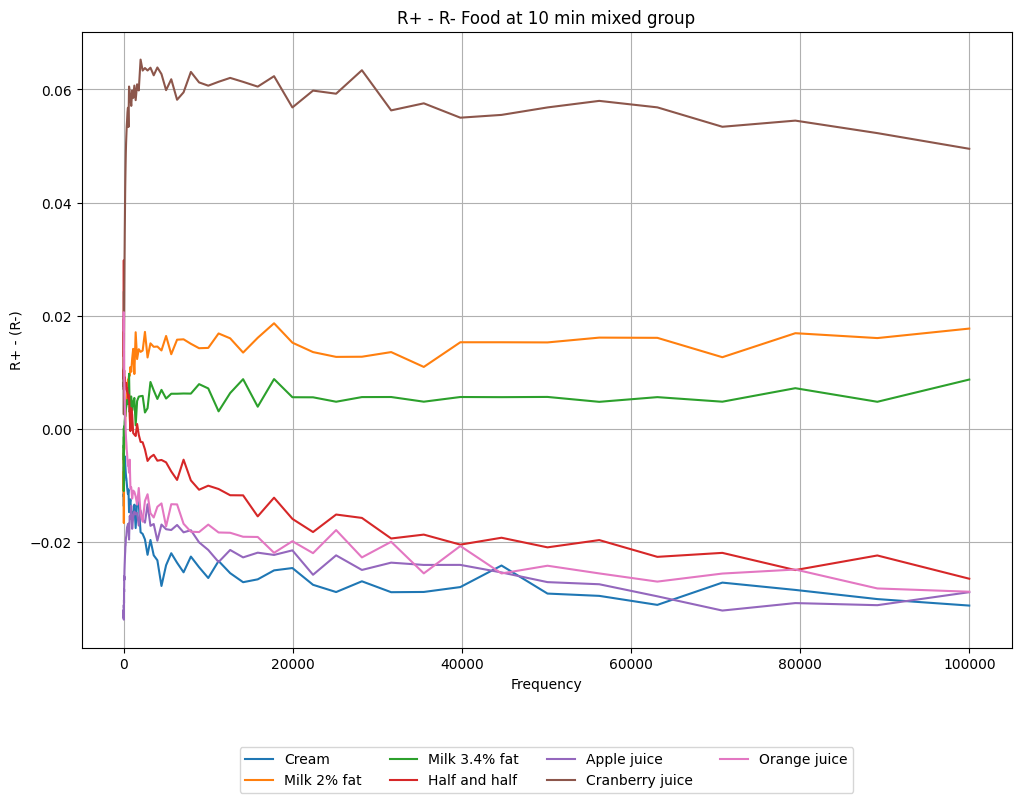

In [42]:

df10mix.set_index("Food", inplace=True)

df10mix = df10mix.T

plt.figure(figsize=(12, 8))
for food in df10mix.columns:
    plt.plot(df10mix.index, df10mix[food], label=food)
plt.xlabel('Frequency')
plt.ylabel('R+ - (R-)')
plt.title('R+ - R- Food at 10 min mixed group')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(True)
plt.show()

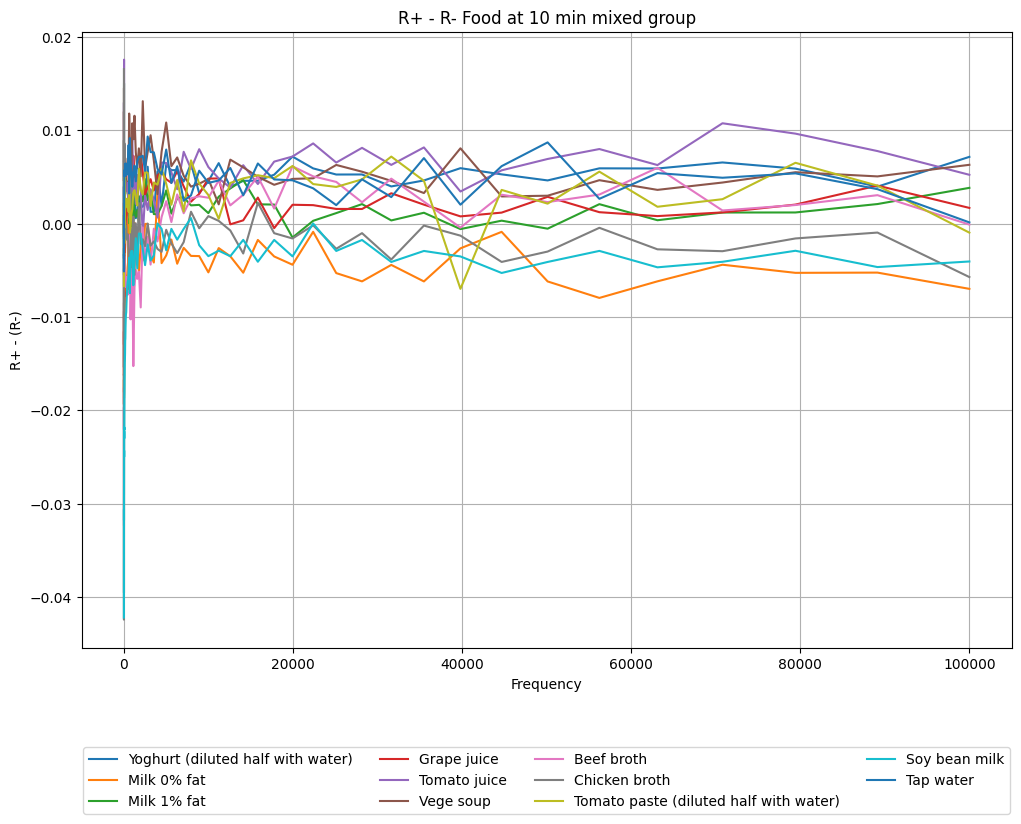

In [43]:
df10mix_2.set_index("Food", inplace=True)

df10mix_2 = df10mix_2.T

plt.figure(figsize=(12, 8))
for food in df10mix_2.columns:
    plt.plot(df10mix_2.index, df10mix_2[food], label=food)
plt.xlabel('Frequency')
plt.ylabel('R+ - (R-)')
plt.title('R+ - R- Food at 10 min mixed group')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.grid(True)
plt.show()